## Machine Learning with Scikit-Learn

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

### The Iris data
- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width
- Framed as a **supervised learning** problem: Predict the species of an iris using the measurements
- Famous dataset for Machine Learning because prediction is **easy**
- Learn more about the iris dataset: [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)

### Loading the iris dataset into scikit-learn

In [2]:
# import load_iris function from datasets module
iris = load_iris()
print(iris.data[0:5,:])
print(type(iris.data))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
<class 'numpy.ndarray'>


- Each row is an **observation** (also known as: sample, example, instance, record)
- Each column is a **feature** (also known as: predictor, attribute, independent variable, input, regressor, covariate)

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


- Each value we are predicting is the **response** (also known as: target, outcome, label, dependent variable)
- **Classification** is supervised learning in which the response is categorical
- **Regression** is supervised learning in which the response is ordered and continuous

In [6]:
# check the shape of the features (first dimension = number of observations, second dimensions = number of features)
print(iris.data.shape)

(150, 4)


In [7]:
# check the shape of the response (single dimension matching the number of observations)
print(iris.target.shape)

(150,)


In [8]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

### Visualising the data

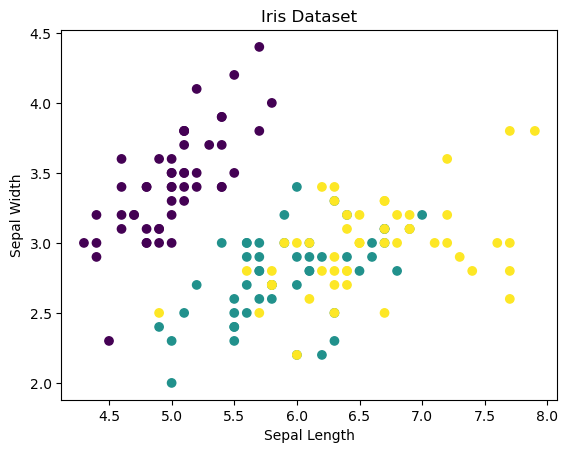

In [9]:
# Create a scatter plot of the iris dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset')
plt.show()

### scikit-learn 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [10]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [12]:
print(knn)

KNeighborsClassifier(n_neighbors=3)


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [13]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [14]:
y_pred = knn.predict(X)

### K-Nearest Neighbors (KNN)
K-Nearest Neighbors (KNN) is a simple yet powerful machine learning algorithm used for both classification and regression tasks. It is a non-parametric algorithm, meaning it does not make any assumptions about the underlying data distribution. KNN works by finding the k nearest neighbors to a given data point based on a distance metric, such as Euclidean distance. The algorithm then assigns a label or predicts a value based on the majority vote or average of the labels or values of its nearest neighbors.

### Visualise the prediction (in 2D)

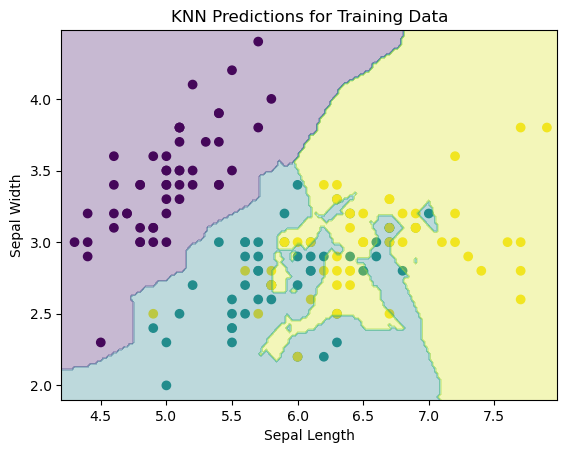

In [15]:
knn_2D = KNeighborsClassifier(n_neighbors=3)
knn_2D.fit(X[:,0:2], y)

# Create a meshgrid of points
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Make predictions on the meshgrid points
Z = knn_2D.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

# Create a scatter plot of the training data with predicted labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Predictions for Training Data')
plt.show()

### Model Evaluation
Classification accuracy:

- **Proportion** of correct predictions, known as **training accuracy** when you train and test the model on the same data
- Common **evaluation metric** for classification problems

In [16]:
# compute classification accuracy for the KNN model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


If we train a highly flexible model we get a higher accuracy.

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data

### Evaluation procedure: Train/test split
1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

In [18]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

What did this accomplish?

- Model can be trained and tested on **different data**
- Response values are known for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [19]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


Train KNN-Classifier for different values of k to find the best hyperparameter.

In [20]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

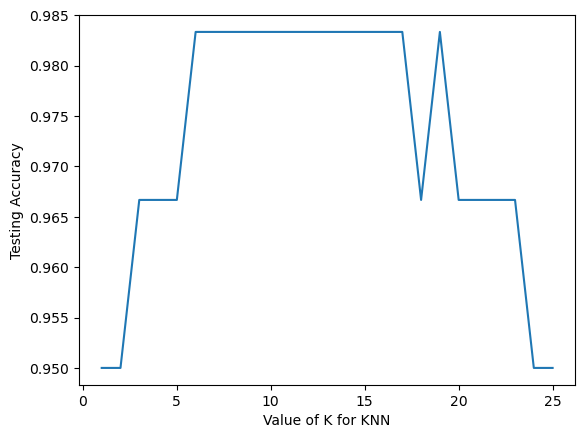

In [21]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

- **Training accuracy** rises as model complexity increases
- **Testing accuracy** penalizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the **value of K** (lower value = more complex)

### Downsides of train/test split?
- Provides a **high-variance estimate** of out-of-sample accuracy: We are choosing the model with the best prediction in the test data, but this means an out-of-sample prediction should have less accuracy.
- **K-fold cross-validation** overcomes this limitation
- But, train/test split is still useful because of its **flexibility and speed**

### Steps for K-fold cross-validation
1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

In [22]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


- Dataset contains **25 observations** (numbered 0 through 24)
- 5-fold cross-validation, thus it runs for **5 iterations**
- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**

### Comparing cross-validation to train/test split
Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

### Cross-validation recommendations
1. K can be any number, but **K=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

### Cross-validation example: parameter tuning
**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [23]:
from sklearn.model_selection import cross_val_score

# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


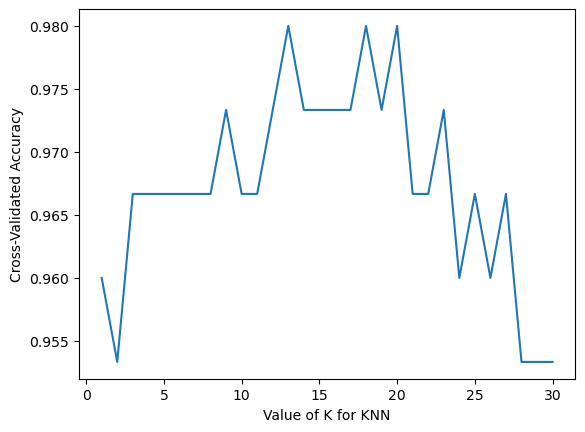

In [24]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Further improvements
**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**

**Feature engineering and selection within cross-validation iterations**

- Normally, feature engineering and selection occurs **before** cross-validation
- Instead, perform all feature engineering and selection **within each cross-validation iteration**
- More reliable estimate of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data

**Grid Search for multiple hyperparameters**
- Extends the ideas of cross-validation to more than one hyperparameter
- Allows for efficient exploration of a grid of potential parameter values

**Different Evaluation Metrics**
- We only used accuracy to evaluate our model
- Many different evualuation metrics exist, for example F1-score etc.
- Which evualation metric should be chosen depends on the prediction problem
